### Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import dataset

In [11]:
df=pd.read_csv('./data/car data.csv')
pd.set_option('display.max_columns', None)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Cleanup/ Preprocessing

In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
final_data=df.drop(['Car_Name'],axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

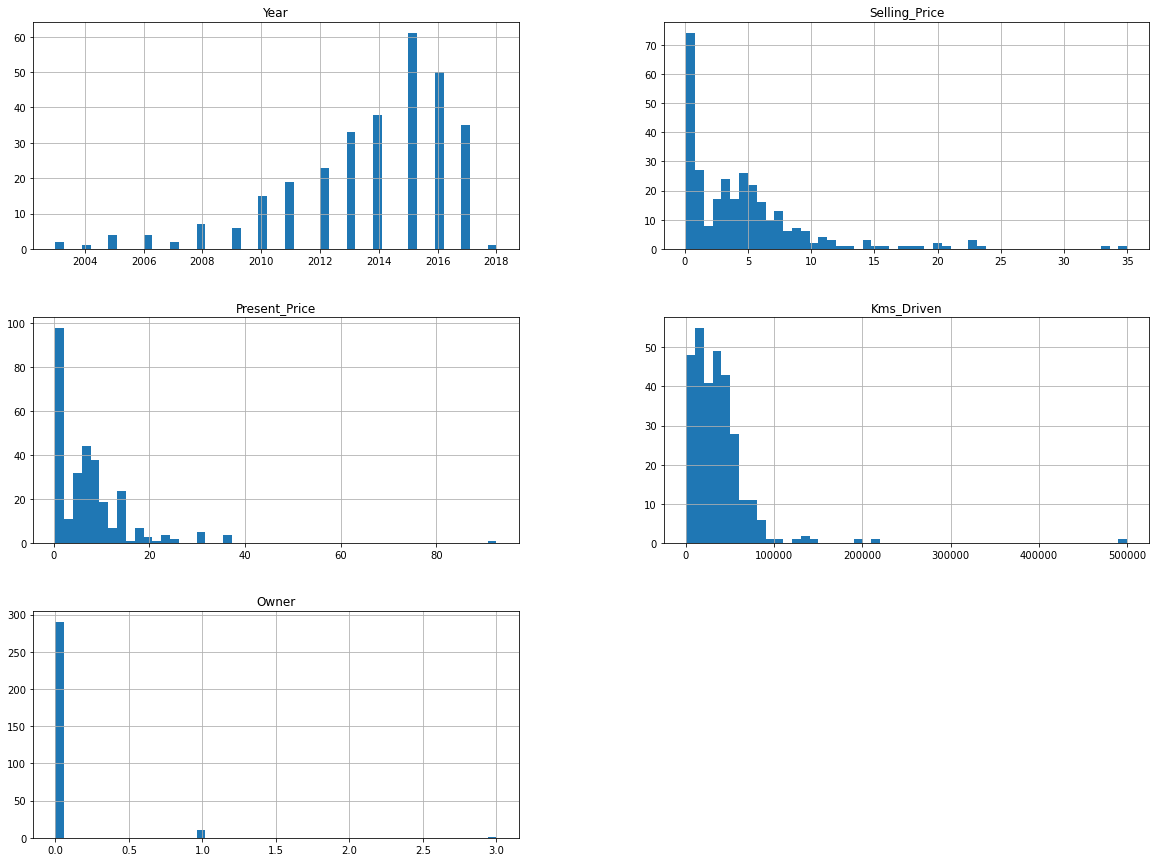

In [16]:
%matplotlib inline
#for plotting histogram
import matplotlib.pyplot as plt
final_data.hist(bins=50, figsize=(20, 15))

In [17]:
final_data['Current Year']=2020
final_data['no_year']=final_data['Current Year']- final_data['Year']

In [18]:
final_data.drop(['Year'],axis=1,inplace=True)
final_data.drop(['Current Year'],axis=1,inplace=True)

### Data Encoding

In [19]:
final_data=pd.get_dummies(final_data,drop_first=True)
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


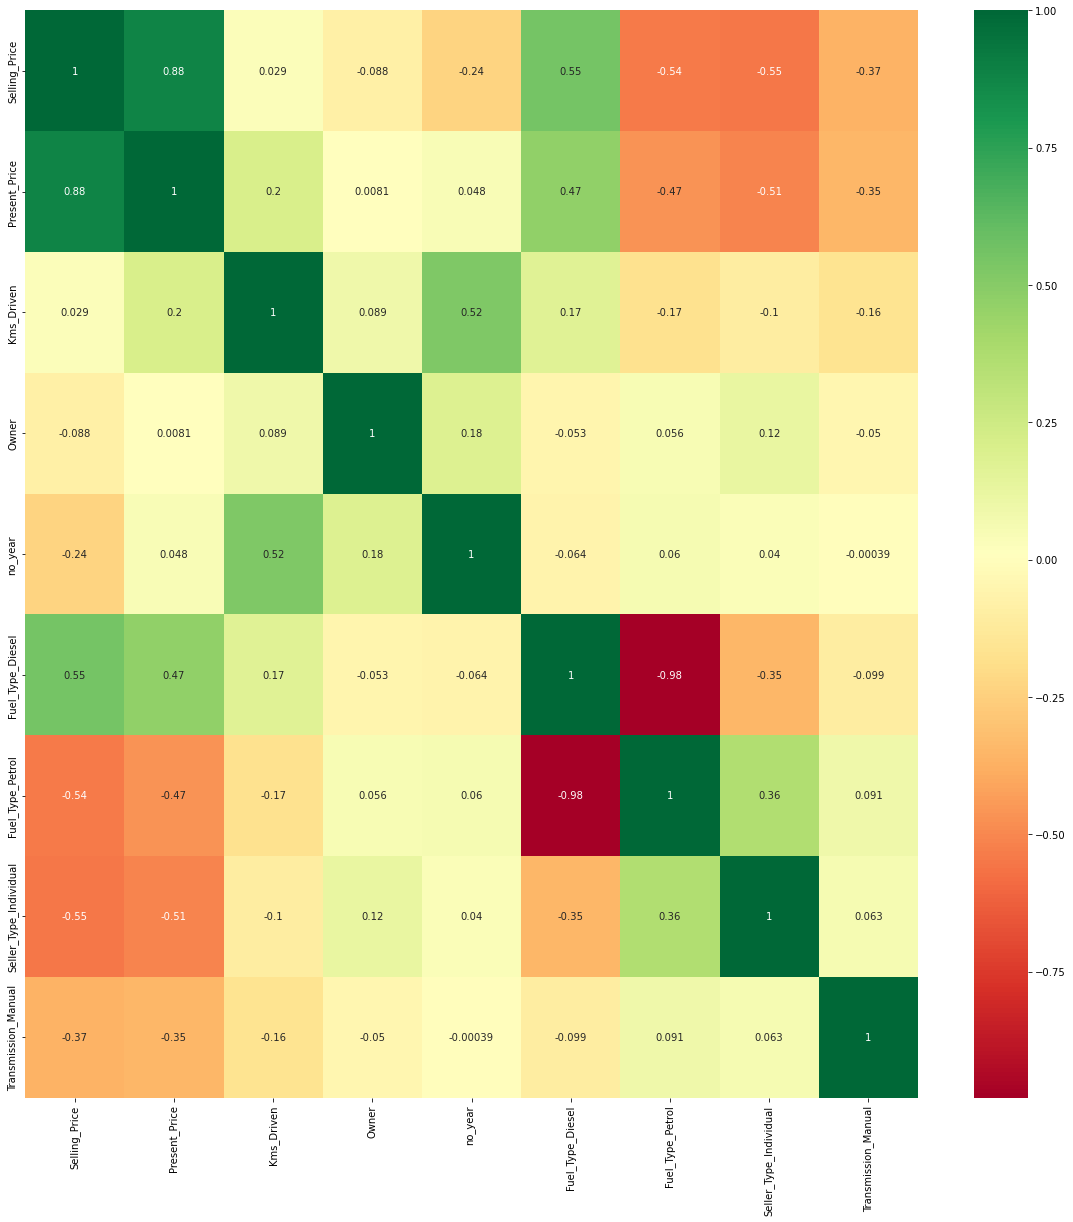

In [20]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
X=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

### Test and Train split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

array([[<AxesSubplot:xlabel='Present_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='no_year', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Fuel_Type_Diesel', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Fuel_Type_Petrol', ylabel='Present_Price'>],
       [<AxesSubplot:xlabel='Present_Price', ylabel='Kms_Driven'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Kms_Driven'>,
        <AxesSubplot:xlabel='no_year', ylabel='Kms_Driven'>,
        <AxesSubplot:xlabel='Fuel_Type_Diesel', ylabel='Kms_Driven'>,
        <AxesSubplot:xlabel='Fuel_Type_Petrol', ylabel='Kms_Driven'>],
       [<AxesSubplot:xlabel='Present_Price', ylabel='no_year'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='no_year'>,
        <AxesSubplot:xlabel='no_year', ylabel='no_year'>,
        <AxesSubplot:xlabel='Fuel_Type_Diesel', ylabel='no_year'>,
        <AxesSubplot:xlabel='Fuel_Type_Petrol', ylabel='no_year'>],
 

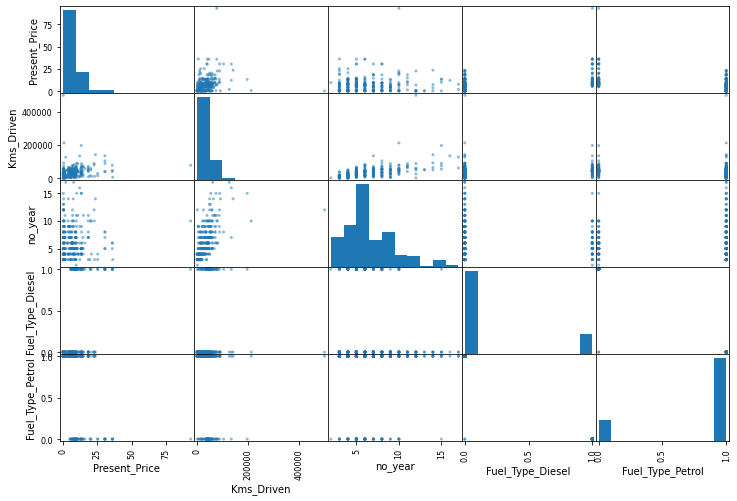

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["Present_Price", "Kms_Driven","no_year", "Fuel_Type_Diesel", "Fuel_Type_Petrol"]
scatter_matrix(final_data[attributes], figsize= (12,8))

### Feature Selection

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [25]:
model=RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
##Hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [27]:
rf = RandomForestRegressor()

In [28]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

#### Evaluating the model

In [29]:
from sklearn.metrics import mean_squared_error
carprice_predictions = rf_random.predict(X_train)
mse = mean_squared_error(y_train,carprice_predictions)
rmse = np.sqrt(mse)

In [30]:
mse

2.6151697005352044

In [31]:
rmse

1.6171486327901974

### Prediction with test data

In [32]:
predictions=rf_random.predict(X_test)

In [33]:
predictions

array([ 6.86858114,  2.82277276,  0.56104464,  2.83527482,  1.12131112,
        5.30557439,  0.7238736 ,  3.18744027, 10.00199411,  0.60977651,
        7.75855003,  3.86463727,  5.29943889,  4.39687958,  0.23706815,
        0.36555782,  7.51371162,  5.26006927,  5.28691264,  7.520365  ,
        5.1735461 ,  3.71086864, 13.33513761,  7.5959841 , 17.87789998,
        3.09140697,  3.61357442,  0.620722  ,  0.28811788,  0.48417406,
        0.31900726,  0.26749414,  5.13009642, 21.169055  , 20.78250365,
        4.35176792,  3.60322826,  0.86439778,  0.32147316,  4.1657761 ,
       10.05682267, 10.25182033,  0.32385205,  4.4144108 ,  4.3949898 ,
        4.673751  ,  6.18615981,  7.42433803,  8.05346464,  1.16474442,
        4.83381403,  0.42569809,  2.80608865,  4.55650815,  1.16499517,
        0.23208983, 21.169055  ,  0.62043324,  6.11749364,  5.90210219,
        0.29267324])

/Users/rajatbanerjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

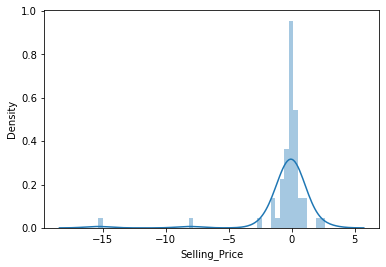

In [34]:
sns.distplot(y_test-predictions)

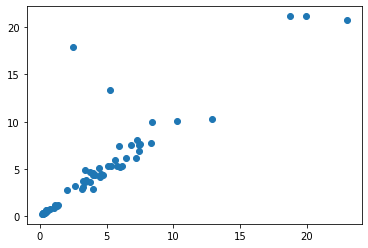

In [35]:
plt.scatter(y_test,predictions)

In [36]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8712408029727763
MSE: 5.541688839899043
RMSE: 2.354079191509717


In [37]:
import pickle
#open a file and store the data
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(rf_random,f)